<a href="https://colab.research.google.com/github/AlexandraJMV/ADA-Informes/blob/main/Informe_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema: ***Árbol binario de búsqueda óptimo***


Imaginando que se necesite utilizar un árbol binarios de búsqueda para cierta operación, nos encontramos que podemos asegurar un tiempo de ejecución promedio de $O(log n)$ utilizando algún método que matenga el árbol balanceado *(árboles rojo-negro, por ejemplo)*.
Sin embargo si resulta que cada elemento dentro del árbol de búsqueda tiene una frecuencia distinta, este método no asegura que minimice la cantidad de nodos visitados en promedio.

Queremos que aquellos elementos buscados con mayor frecuencia se encentren mád cercanos a la raíz, pues así se disminuirá la cantidad de nodos visitados en promedio.

#### **Entrada**: *Una secuencia $K = {k_1, k_2.. k_n}$ de $n$ claves distintas y ordenadas de forma que $k_1 < k_2.. < k_n$, para el cual cada valor $k$ está asociado a una probabilidad $p_i$ de ser buscada. Además, se entregan claves ficticias $d_i$ con probabilidades $q_i$ de ser buscadas, siendo la suma de todas las probabilidades $p_i$ y $q_i$ igual a $1$*

#### **Salida**: *Construcción de un árbol de búsqueda óptimo de $n$ elementos que minimice la cantidad esperada de nodos visitados.*


<center>
<img src="https://miro.medium.com/max/762/1*8q7D6e1l-gxzry_FS-6uIA.png">

Distintas formas de realizar un árbol de búsqueda binaria de tres elementos
</center> 


Dado un número dado $n$ de claves, la siguiente fórmula indica la cantidad total de árboles que se pueden generar:

<center>

$\frac{(2n)!}{(n+1)!n!}$

</center>

Como se muestra en la imagen de arriba, para tres claves se pueden formar $5$ árboles binarios con distinto o igual costo uno del otro. Por lo que se ve, el revisar todas las combinaciones posibles resulta una tarea larga.



























# **2. Descripción del algoritmo**



## ***2.1 Código***
A continuación, se muestran los códigos para dos versiones de la implementacion para la resolución del problema.

El primero consiste en una solución recursiva, mientras que el segundo utiliza la programación dinámica para resolver el problema.

### ***2.1.1 Funciones auxiliares***

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import random
import numpy as np

In [5]:
def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n])           # Probabilidad de las claves
    q = arr[n:]                 # Probabilidad de las claves ficticias
    return keys, [0]+p, q

In [6]:
# Codigo para construcion del arbol a partir de solucion recursiva
# el arbol esta inicialmente representado por una lista de relaciones padre-hijo

def show_tree(keys, relations):

    T =  nx.DiGraph()
    n = len(keys)

    # Tamaño y titulo de la figura
    fig = plt.figure(1, figsize=(10, 10))
    plt.title("Arbol optimo")

    # Agregar nodos con sus id

    # Nodos claves tienen id = [1...n], el nodo de id = 2 sera la segunda clave del arreglo ordenado
    # Nodos ficticios tomaran id = [n + 1..2n + 1], siendo el nodo n + 1 aquel que 
    # corresponde a la primera frecuencia de la lista de frecuencias

    for i in range(2*n + 1):
        T.add_node(i+1)
    
    # Agregar arcos segun relations
    for child, parent in relations:
        if parent == -1: continue   # Nodo raiz
        else:
            T.add_edge(parent,child)
    
    # Node names
    node_names = dict(list(enumerate(keys, 1)))

    fictional_names = dict()
    for i in range(n+1, 2*n+2):
        fictional_names[i] = f"d{i-n-1}"

    node_names = {**node_names, **fictional_names}

    # Posicion
    pos = graphviz_layout(T, prog="dot")

    # Arcos
    labels = nx.get_edge_attributes(T,'weight')
    nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=14)

    # Nodos
    nx.draw(T,pos, node_color='pink', with_labels=True, labels = node_names, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

    return

In [7]:
# Agregacion de nodos y arcos para nodos del arbol (no ficticios) de forma recursiva
# Obs: de momento, la implementacion no le da raiz a los nodos hoja. Se agregan 'al azar' aqui

def construct_optimal_bst(T, roots, i, j):

    # Se extrae la raiz del rango de keys y se procede
    # a extraer la raiz de sus dos mitades de forma recursiva

    if i == j:      # Caso base, el arbol tiene 1 key
        T.add_node(i)
        return i
    
    if i > j :      # Caso base, el arbol tiene 0 keys
        return 0

    root = roots[i][j]
    T.add_node(root)

    # Mitad izquierda
    lroot = construct_optimal_bst(T, roots, i, root-1)
    if lroot > 0 : T.add_edge(root, lroot)

    # Mitad derecha
    rroot = construct_optimal_bst(T, roots, root+1, j)
    if rroot > 0 : T.add_edge(root, rroot)

    return root

# Se agregan nodos hoja y se grafica el arbol
def show_recursive_construction(T, roots, keys):

    n = len(keys)

    construct_optimal_bst(T, roots, 1, n)

    # Agregamos las hojas
    for i in range(n+1, 2*n + 2):
        T.add_node(i)

    # Las relacionamos
    # un nodo hoja i puede tener uno o dos nodos nodos ficticios. i-1 e i

    leaf = []
    pos = 0

    for node in T:
        if node <= n:
            if len(T.edges(node)) < 2:
                leaf.append([node,len(T.edges(node))])

    fictional = n + 1

    for node, children in leaf:

        if children == 0:
            T.add_edge(node, fictional)
            fictional+= 1
            T.add_edge(node, fictional)
            fictional += 1
        elif children == 1:
            T.add_edge(node, fictional)
            fictional += 1

    # Node names
    node_names = dict(list(enumerate(keys, 1)))

    fictional_names = dict()
    for i in range(n+1, 2*n+2):
        fictional_names[i] = f"d{i-n-1}"

    node_names = {**node_names, **fictional_names}

    # Titulo y tamaño de la figura
    fig = plt.figure(1, figsize=(10, 10))
    plt.title("Arbol optimo")

    # Posicion
    pos = graphviz_layout(T, prog="dot")

    # Arcos
    labels = nx.get_edge_attributes(T,'weight')
    nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=14)

    # Nodos
    nx.draw(T,pos, node_color='pink', with_labels=True, labels = node_names, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

    return

### ***2.1.2 Implementacion recursiva***

El costo del arbol optimo es 2.75 con 242 llamadas


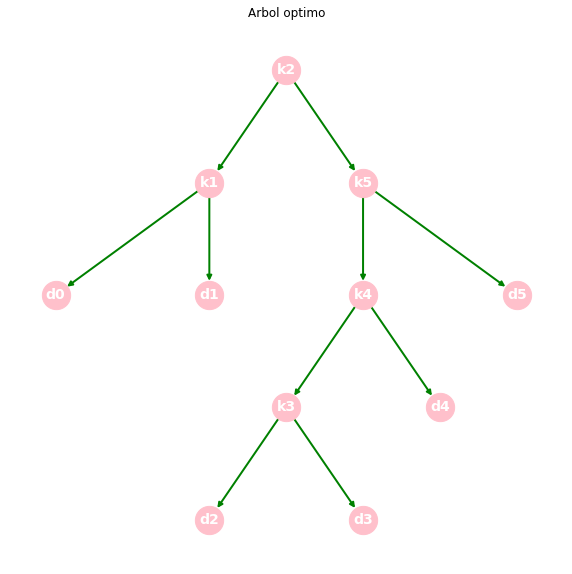

In [8]:
# Implementacion recursiva para el problema de la busqueda binaria optima

def recursive_cost(p,q,i,j, verbose = False, calls = 0, parent = -1):
    if j == i-1:            # Caso base, no hay elementos
        if verbose == True:
            print(f"\nLlamada recursiva {calls}")
            print(f"Se busca valor optimo de la clave k{i}..k{j}\n")
            print(f"Este subarbol solo tiene una clave ficticia d{i-1} de frecuencia {q[i-1]:.3f}")
            print(f"----------------------------------------------------------------\n")

        roots = [(len(p)-1+i, parent)]
        return q[i-1], calls, roots

    psum = sum(p[i:j+1])    # Suma frecuencias de claves 
    qsum = sum(q[i-1:j+1])  # Suma freuenacia de claves ficticias

    fmin = 9999999999
    root = -1
    finalroot = []

    if verbose == True and calls > 0:
        print(f"\nLlamada recursiva {calls}")
        print(f"Se busca valor optimo de la clave k{i}..k{j}\n")

    # Dentro del rango de claves k_i...k_j, se va considerando cada elemento k_r
    # como potencial raiz de un arbol binario. Se llama a la funcion
    # con tal de calcular el menor costo esperado de sus subarboles recursivamente,
    # retornado al finalizar el costo minimo una vez se hayan probado todas las 
    # combinaciones posibles

    # Se almacena de abajo hacia arriba aquellas relaciones (hijo, padre)
    # que conformaran el arbol binario optimo mas adelante.

    for r in range(i,j+1):
        minroot = []

        # Llamada recursiva a subarbol izquierdo, actualizacion llamadas
        lcost, lcalls , lroot= recursive_cost(p, q, i, r-1, calls = calls + 1, verbose = verbose, parent = r)
        calls = lcalls           

        # Llamada recursiva a subarbol derecho, actualizacion llamadas
        rcost, rcalls, rroot= recursive_cost(p, q, r+1, j, calls = calls + 1, verbose = verbose, parent = r)
        calls = rcalls              

        cost = lcost + rcost        # Costo para el subarbol de claves k_i..k_j con raiz en k_r

        minroot = lroot + rroot

        if cost < fmin: 
            fmin = cost             # Actualizacion costos
            root = r
            finalroot = minroot + [(root, parent)]
        
        if verbose == True:
            print(f"----> Resultado de la llamada recursiva {calls}")
            print(f"----> Costo minimo : {cost}")
            print(f"----> Raiz y padre: {root}, {parent}\n")

        

    return fmin + psum + qsum, calls, finalroot


def recursive_bst(keys, p, q, n, visualize = False, verbose = False):
    if verbose == True:
        print(f"-------Arbol de Busqueda binaria optimo----------\n")
        print(f"El arbol a construir tiene {n} keys")
        print(f"Frecuencia en la que aparece cada key :\n--->{p[1:]}\n")
        print(f"Frecuencia para claves ficticias :\n--->{q}")

        print(f"----------------------------------------------------")
    costo, llamadas, relaciones = recursive_cost(p, q, 1, n, verbose = verbose)

    if visualize == True :
        show_tree(keys, relaciones)
    
    return costo, llamadas, relaciones

# Ejemplo

keys = ["k1","k2","k3","k4","k5"]
p=[0,0.15,0.1,0.05,0.1,0.2]
q=[0.05,0.1,0.05,0.05,0.05,0.1]
n=5

costo, llamadas, relaciones = recursive_bst(keys, p,q, n, visualize = True)
print(f"El costo del arbol optimo es {costo} con {llamadas} llamadas")

### ***2.1.3 Acercamiento bottom-up***

El costo del arbol optimo es 2.75


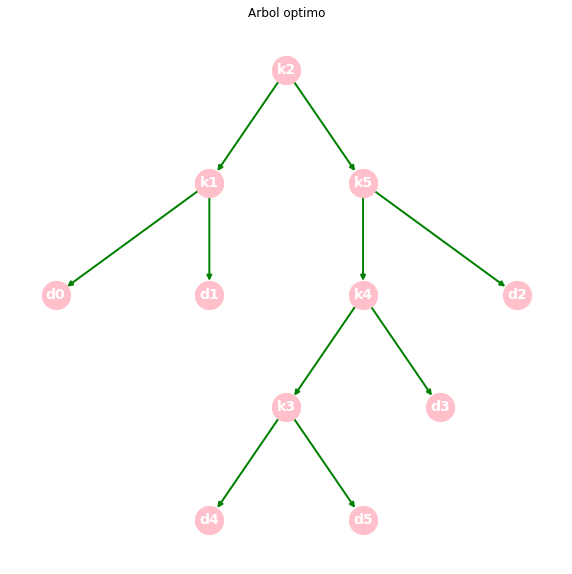

In [9]:
# Acercamiento bottom-up

def optimal_bst(keys, p, q, n, verbose = False, visualize = False):
    if verbose == True:
        print(f"Lista de claves : {keys}")
        print(f"p = {p}")
        print(f"q = {q}\n")

        print("\n-----------------------------------------------------------------\n")

    # Matrices para almacenar resultados
    e = [[0 for _ in range(n+1)] for _ in range(n+2)]
    w = [[0 for _ in range(n+1)] for _ in range(n+2)]
    root = [[0 for _ in range(n+1)] for _ in range(n+1)]

    # Contador de subproblemas
    subp = 0

    # Inicializando diagonales en matriz uqe guarda resultados
    for i in range(1,n+2): 
        e[i][i-1] = q[i-1]
        w[i][i-1] = q[i-1]

    # Resolucion de subproblemas
    for l in range(1,n+1): 
        for i in range(1, n-l+2):

            subp += 1

            # Inicializacion de e y calculo de w
            j = i+l-1
            e[i][j] = 99999999
            w[i][j] = round(w[i][j-1] + p[j] + q[j], 3)

            if verbose == True:
                print(f"Subproblema {subp}\n")

                print(f"Calculando para arbol en rango {i} a {j}\n")

                print(f"w[i][j-1] + p[j] + q[j] = w")
                print(f"w calculado = {w[i][j-1]:.3f} + {p[j]:.3f} + {q[j]:.3f} = {w[i][j]:.3f}\n")

            # Busqueda de raiz optima
            for r in range(i, j+1):

                # Calculo de costo en raiz r
                t = round(e[i][r-1] + e[r+1][j] + w[i][j], 3)

                if verbose == True:
                    print(f"--> Considerando candidato a raiz = {r}")
                    print(f"--> e[i][r-1] + e[r+1][j] + w[i][j]")
                    print(f"--> t = {e[i][r-1]:.3f} + {e[r+1][j]:.3f} + {w[i][j]:.3f} = {t:.3f}\n" )


                # Actualizacion en caso que corresponda
                if t < e[i][j]:

                    if verbose == True:
                        print(f"-----> t es un candidato a costo! {t:.3f}")
                        print(f"-----> La raiz temporal de este arbol es: {r}\n")

                    e[i][j] = t
                    root[i][j]  = r
            if verbose == True:
                print("\n-----------------------------------------------------------------\n")

        if verbose == True:
            print(f"Estado de las matrices:\n")
            print(f"w =")
            for i in w:
                print(i)
            print()
            print(f"e =")
            for i in e:
                print(i)
            print()
            print(f"root =")
            for i in root:
                print(i)
            print()

            #print("\n-----------------------------------------------------------------\n")
    
    # Graficar arbol a partir de root
    if visualize ==  True:
        T = nx.DiGraph()
        show_recursive_construction(T, root, keys)
    
    return e, root, subp

# Ejemplo

keys = ["k1","k2","k3","k4","k5"]
p=[0,0.15,0.1,0.05,0.1,0.2]
q=[0.05,0.1,0.05,0.05,0.05,0.1]
n=5

e, root, problems = optimal_bst(keys, p, q, n, visualize = True)

print(f"El costo del arbol optimo es {e[1][5]}")

## ***2.2 Descripción del algoritmo***
Dada la superposición de subproblemas, el implementar una solución recursiva del tipo *divide y vencerás* resuelve el problema de forma ineficiente. Es necesario definir una solución utilizando **programación dinámica**, donde se resuelven subproblemas de forma similar al paradigma anterior, pero se almacenan los resultados para evitar el re-cálculo de resultados que ya habían sido considerados<br><br>

---

<br>Antes de explicar como funciona el algoritmo, hay que definir ciertas características para asegurar una mejor comprensión.

La solución con **programación dinámica** para este problema consiste en rellenar información para subrangos de indices. Por ejemplo, asumiendo que exista la matriz que guarde información para un problema de tamaño $n = 8$, el rango de indices $(i,j) = (1, 8)$ entregaría el resultado esperado, puesto a que " *considera* " todas las claves $k_1.. k_8$.


Para esto, es necesario definir $3$ matrices.

* $e[1.. n+1][0.. n]$
* $w[1.. n+1][0..n]$
* $root[1..n][1..n]$ 

<br>$e[i][j]$ almacena el costo esperado para un árbol óptimo en el rango $(i, j)$

Esta matriz debe ser capaz de guardar el costo esperado para las claves ficticias $d_n$ y $d_0$ que corresponden a $e[n+1][n]$ y $e[1][0]$, respectivamente

> Ya que hay distintas probabilidades para cada clave real o ficticia, se puede determinar el costo esperado de buscar en un árbol $T$ como la suma del costo de todos los nodos examinados. El costo de un nodo es igual a su profundidad más uno por su frecuencia:
> 

<center>

<img src='https://i.imgur.com/FX14WmH.png'>

<img src='https://i.imgur.com/9XpSkIf.png'>

</center>

>Por lo que el costo de un árbol $T$ con todas sus claves será:
<center>

$E[T] = \sum_{i=1}^{n}(depth_T(k_i)+1)\cdot p_i + \sum_{i=0}^{n}(depth_T(_i)+1)\cdot q_i$

$E[T] = \sum_{i=1}^{n}depth_T(k_i)\cdot p_i + \sum_{i=0}^{n}depth_T(_i)\cdot q_i +(\sum_{i=1}^{n}1\cdot p_i  + \sum_{i=0}^{n}1\cdot q_i)$

</center>

<br><br>Se define $w(i,j)= \sum_{l=i}^{j}1\cdot p_i  + \sum_{l=i-1}^{j}1\cdot q_i$ como la suma de probabilidades de un árbol en rango $(i, j)$ y $w[i][j]$ la posición del resultado en la matriz. Además, se nota que cuando un árbol se transforma en un subárbol de otro, su profundidad aumenta en uno.  


Para algún subárbol de claves entre $(k_i, k_j)$ con raíz en $k_r$, esto se puede reescribir como:


<center>

$e[i,j] = p_r + (e[i, r-1] + w(i, r-1)) + e[r+1, j] + w(r+1, j)$

$e[i,j] = e[i, r-1] + e[r+1, j] + w(i, j)$

</center>

Se observa que $w[i][j]$ no es nada más que:

<center>

$w[i][j] = w[i][j-1] + p_j + q_j$

</center>

Ya que es la suma de las probabilidades del árbol predecesor *(un elemento menos)* más la probabilidad de nodo real y ficticio del elemento que se agregó.

Se define $e[i][j]$ como el costo esperado de buscar en un árbol binario óptimo con las claves $k_i.. k_j$. Cuando $j = i-1$, se considera que el árbol solo tiene la clave ficticia $d_{i-1}$ *(no hay claves reales en un rango de (2,1) , por ejemplo)*

Por último tenemos $root[i][j]$, que irá almacenando el valor de $r$ que represente la mejor raíz para el subárbol de claves $k_i.. k_j$ por cada iteración.

***Pseudo código***

<img src='https://i.imgur.com/wNr9skI.png'>

El funcionamiento del algoritmo es el siguiente:

* Se definen las matrices $e$, $w$ y $root$
* Se rellenan las diagonales $(i,i-1)$ para cada valor posible de $i$ en las matrices $e$ y $w$. Estas diagonales representan los casos base, es decir, el subproblema más pequeño *(cuando solo tenemos a clave ficticia $d_{i-1}$)*
* A partir de los casos bases ya establecidos, calculamos iterativamente los resultados esperados a través de 3 *loops* concatenados.


> Loop 1, **$for$ l = 1 $to$ n**:
>
> Se encarga de calcular $e[i][j]$ y $w[i][j]$ para toda combinación de $(i,j)$. Se nota que ambas matrices se van rellenando ' *en diagonal* ' por cada iteración $l$, resolviendo gradualmente problemas de menor a mayor tamaño como se nota en las diferencias entre $(i,j)$
> 
> $l$ toma valores de $1..n$ y controla el rango de los índices $i$ y $j$.
> Por ejemplo, en la primera iteración $l = 1$, $i$ toma valores de $[1..n]$, mientras que en la última iteración $l = n$, $i$ solo tomará el valor $1$.
>
>En cuanto a $j$, este se ve también controlado por $i$ de la siguiente forma:
>> Loop 2,  **$for$ i = 1 $to$ n-l+1**: 
>>
>>Se encarga de resolver un problema específico. Cada iteración de este loop entregará los valores $e[i][j]$ y $w[i][j]$ especificos para cierto par  $(i,j)$. Se observa que el tamaño del problema en laguna iteración $l$ será de $l$, puesto a que la diferencia entre $i$ y $j$ es $l-1$
>>
>> * Por ejemplo, para $i = 2$ y $j = 4$, $l = 3$. El problema tiene 3 elementos $[2, 3, 4]$  
>>
>>Se define el valor del índice $j = i + l -1$, inicializa $e[i][j] = ∞$ puesto a que se busca un valor mínimo, y se calcula $w[i][j]$ a partir de lso resultados anteriores como se definió anteriormente.
>>> Loop 3, **$for$ i = 1 $to$ n-l+1**:
>>>
>>>  Se encarga de calcular los valores posibles de $e[i][j]$ considerando todos los candidatos a raíz $r$. Actualiza cuando corresponda el valor de $e[i][j]$ con tal de almacenar el mínimo y guarda el valor $r$ de esta en la matriz $root[i][j]$.
>>>
>>> Los valores de  $e[i][j]$ son calculados a partir de los valores anteriores como lo indicó la fórmula mencionada anteriormente: $e[i,j] = e[i, r-1] + e[r+1, j] + w(i, j)$
>>>
>>> Que $root[i][j] = r$ significa que, para el subárbol conteniendo las claves $k_i.. k_j$, $k_r$ es la raíz.
>>>
>>> Esta información ayudará a visualizar el árbol más adelante.

* Al finalizar, se retornan las matrices $e$ y $root$.

Para un problema de tamaño $n$, el costo mínimo del árbol será dado por $e[1][n]$ *(Considera todas las claves $k_1... k_n$)*








>

## ***2.3 Ejemplo***

Consideremos los siguientes arreglos:

$K = [8, 11, 33]$

$p = [0.26, 0.05, 0.2]$

$q = [0.1, 0.13, 0.11, 0.15]$

Siendo $K$ el arreglo ordenado de claves, $p$ la frecuencia para cada clave y $q$ la frecuencia para las claves ficticias.

Creamos las matrices $e$, $w$, y $root$ para el almacenamiento de infromación.

Recordar que los índices que utilizamos son $i = [1..n + 1]$ para las filas y $j = [0... n]$ para las filas *(la primera fila no se utilizará en $e$ ni $w$)*

Luego, se rellena la diagonal $(i,i-1)$ de $e$ con el costo para los casos base $j = i-1$, es decir, cuando solo está la clave $d_{i-1}$.

$e =$
<center>

    {0,  0,  0,  0}
    {0.1, 0, 0, 0}
    {0, 0.13, 0, 0}
    {0, 0, 0.11, 0}
    {0, 0, 0, 0.15}

</center>

Se hace los mismo para $w$. Se rellena la diagonal $(i, i-1)$ con el cálculo $w(i, j)$, que corresponde a la suma de probabilidades para el rango de claves $(i,j)$. Como $ j = i-1$, solo se considera la clave ficticia $d_{i-1}$

$w =$
<center>

    {0,  0,  0,  0}
    {0.1, 0, 0, 0}
    {0, 0.13, 0, 0}
    {0, 0, 0.11, 0}
    {0, 0, 0, 0.15}

</center>

Ahora se procede a rellenar las matrices con la información correspondiente.<br>

---

<br>`Primera iteración de l, l = 1`

*Para $i$ dede $1$ a $3$*

>`i = 1`, `j = 1`, `e[i][j] = ∞`
>
>`w[i][j] = w[i][j-1] + p_j + q_j`
>
>`w[i][j] = 0.1 + 0.26 + 0.13 = 0.49`
>
>>*Para $r$ desde $i$ a $j$*
>>
>>>`r = i = j = 1`
>>>
>>>`t = e[i][r-1] + e[r+1][j] + w[i][j]`
>>>
>>>`t = 0.1 + 0.13 + 0.49 = 0.72`
>>>
>>>Como t < ∞ : `e[i][j] = t = 0.72`
>>>
>>>`r = 1`
>
>`i = 2`, `j = 2`, `e[i][j] = ∞`
>
>`w[i][j] = 0.1 + 0.05 + 0.11 = 0.29`
>
>>*Para $r$ desde $i$ a $j$*
>>
>>>`r = i = j = 2`
>>>
>>>`t =  0.53`
>>>
>>>Como t < ∞ : `e[i][j] = 0.53`
>>>
>>>`r = 2`
>
>`i = 32`, `j = 3`, `e[i][j] = ∞`
>
>`w[i][j] = 0.46`
>
>>*Para $r$ desde $i$ a $j$*
>>
>>>`r = i = j = 3`
>>>
>>>`t =  0.72`
>>>
>>>Como t < ∞ : `e[i][j] = 0.53`
>>>
>>>`r = 3`

Al finaizar:

$w =$
<center>

    {0,  0,  0,  0}
    {0.1, 0.49, 0, 0}
    {0, 0.13, 0.29, 0}
    {0, 0, 0.11, 0.46}
    {0, 0, 0, 0.15}

</center>

$e =$
<center>

    {0,  0,  0,  0}
    {0.1, 0.72, 0, 0}
    {0, 0.13, 0.53, 0}
    {0, 0, 0.11, 0.72}
    {0, 0, 0, 0.15}

</center>

$root =$
<center>

    {1, 0, 0}
    {0, 2, 0}
    {0, 0, 3}

</center>




---

<br>`Segunda iteración de l, l = 2`

>*Para $i$ dede $1$ a $2$*
>
>`i = 1`, `j = 2`, `e[i][j] = ∞`
>
>`w[i][j] = 0.65`
>
>>*Para $r$ desde $i$ a $j$*
>>
>>>`r = 1` 
>>>
>>>`t = 1.28`
>>>
>>>Como t < ∞ : `e[i][j] = 1.28`
>>>
>>>`r = 1`
>>
>>> `r = 2`
>>>
>>>`t = 1.48`
>
> `i = 2`, `j = 3`, `e[i][j] = ∞`
>
>`w[i][j] = 0.64`
>>*Para $r$ desde $i$ a $j$*
>>
>>>`r = 2` 
>>>
>>>`t = 1.49`
>>>
>>>Como t < ∞ : `e[i][j] = 1.49`
>>>
>>>`r = 2`
>>
>>> `r = 3`
>>>
>>>`t = 1.32`
>>>
>>>Como t < 1.49 : `e[i][j] = 1.32`
>>>
>>>`r = 3`

Al finaizar:

$w =$
<center>

    {0,  0,  0,  0}
    {0.1, 0.49, 0.65, 0}
    {0, 0.13, 0.29, 0.64}
    {0, 0, 0.11, 0.46}
    {0, 0, 0, 0.15}

</center>

$e =$
<center>

    {0,  0,  0,  0}
    {0.1, 0.72, 1.28, 0}
    {0, 0.13, 0.53, 1.32}
    {0, 0, 0.11, 0.72}
    {0, 0, 0, 0.15}

</center>

$root =$
<center>

    {1, 1, 0}
    {0, 2, 3}
    {0, 0, 3}

</center>

---

<br>`Tercera iteración de l, l = 3`

>*Para $i$ dede $1$ a $1$*
>
>`i = 1`, `j = 3`, `e[i][j] = ∞`
>
>`w[i][j] = 1`
>
>>*Para $r$ desde $i$ a $j$*
>>
>>>`r = 1` 
>>>
>>>`t = 2.42`
>>>
>>>Como t < ∞ : `e[i][j] = 2.42`
>>>
>>>`r = 1`
>>
>>> `r = 2`
>>>
>>>`t = 2.44`
>>
>>> `r = 3`
>>>
>>>`t = 2.43`

Al finaizar:

$w =$
<center>

    {0,  0,  0,  0}
    {0.1, 0.49, 0.65, 1}
    {0, 0.13, 0.29, 0.64}
    {0, 0, 0.11, 0.46}
    {0, 0, 0, 0.15}

</center>

$e =$
<center>

    {0,  0,  0,  0}
    {0.1, 0.72, 1.28, 2.42}
    {0, 0.13, 0.53, 1.32}
    {0, 0, 0.11, 0.72}
    {0, 0, 0, 0.15}

</center>

$root =$
<center>

    {1, 1, 1}
    {0, 2, 3}
    {0, 0, 3}

</center>


Al finalizar, terminamos con el siguiente árbol:












































El costo minimo de este arbol es 2.42


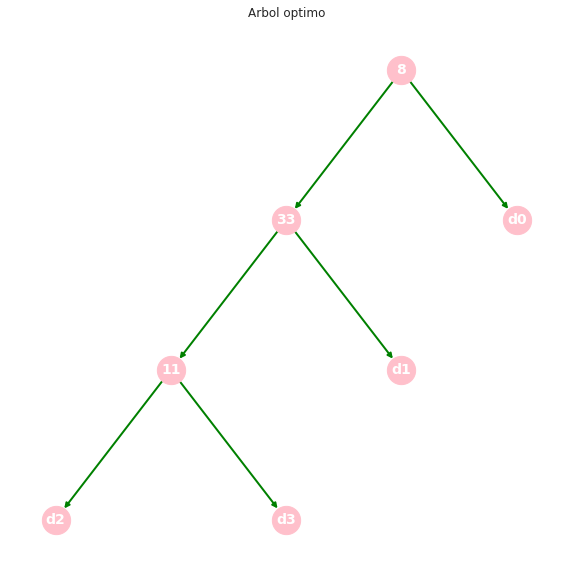

In [314]:
K=[8,11,33] 
p=[0, 0.26,0.05,0.2] 
q=[0.1,0.13,0.11,0.15]

a, b , c = optimal_bst(K,p, q, 3, visualize=True)
print(f"El costo minimo de este arbol es {a[1][3]}")

## ***2.4 Ejecución paso a paso*** `verbose = True`

A continuación se presenta la ejecución paso a paso para ambas implementaciones, además de la visualización del árbol resultante.

Se realizará para $n=3$ dada la alta cantidad de llamadas recursivas que realizaría la función para tamaños mayores *(Serían demasiadas líneas!)*


In [315]:
keys, p, q = optimal_bst_instance_generator(3)


### ***2.4.1 Ejecución paso a paso de la solución recursiva***





-------Arbol de Busqueda binaria optimo----------

El arbol a construir tiene 3 keys
Frecuencia en la que aparece cada key :
--->[0.23841700494309848, 0.1540170205989895, 0.2090174399584264]

Frecuencia para claves ficticias :
--->[0.01729786 0.01740089 0.14634351 0.21750628]
----------------------------------------------------

Llamada recursiva 1
Se busca valor optimo de la clave k1..k0

Este subarbol solo tiene una clave ficticia d0 de frecuencia 0.017
----------------------------------------------------------------


Llamada recursiva 2
Se busca valor optimo de la clave k2..k3


Llamada recursiva 3
Se busca valor optimo de la clave k2..k1

Este subarbol solo tiene una clave ficticia d1 de frecuencia 0.017
----------------------------------------------------------------


Llamada recursiva 4
Se busca valor optimo de la clave k3..k3


Llamada recursiva 5
Se busca valor optimo de la clave k3..k2

Este subarbol solo tiene una clave ficticia d2 de frecuencia 0.146
----------------------

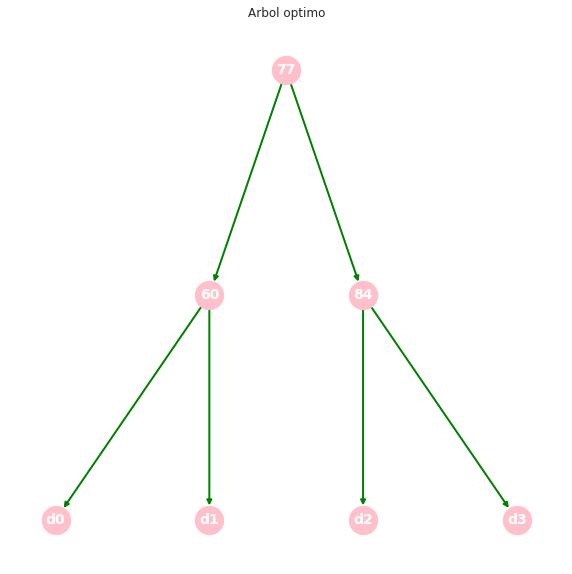

In [316]:
recursive_bst(keys, p, q, len(keys), verbose = True, visualize = True)
print()

### ***2.4.2 Ejecución paso a paso de la solución dinámica***


Lista de claves : ['k1', 'k2', 'k3', 'k4', 'k5']
p = [0, 0.15, 0.1, 0.05, 0.1, 0.2]
q = [0.05, 0.1, 0.05, 0.05, 0.05, 0.1]


-----------------------------------------------------------------

Subproblema 1

Calculando para arbol en rango 1 a 1

w[i][j-1] + p[j] + q[j] = w
w calculado = 0.050 + 0.150 + 0.100 = 0.300

--> Considerando candidato a raiz = 1
--> e[i][r-1] + e[r+1][j] + w[i][j]
--> t = 0.050 + 0.100 + 0.300 = 0.450

-----> t es un candidato a costo! 0.450
-----> La raiz temporal de este arbol es: 1


-----------------------------------------------------------------

Subproblema 2

Calculando para arbol en rango 2 a 2

w[i][j-1] + p[j] + q[j] = w
w calculado = 0.100 + 0.100 + 0.050 = 0.250

--> Considerando candidato a raiz = 2
--> e[i][r-1] + e[r+1][j] + w[i][j]
--> t = 0.100 + 0.050 + 0.250 = 0.400

-----> t es un candidato a costo! 0.400
-----> La raiz temporal de este arbol es: 2


-----------------------------------------------------------------

Subproblema 3

Calculand

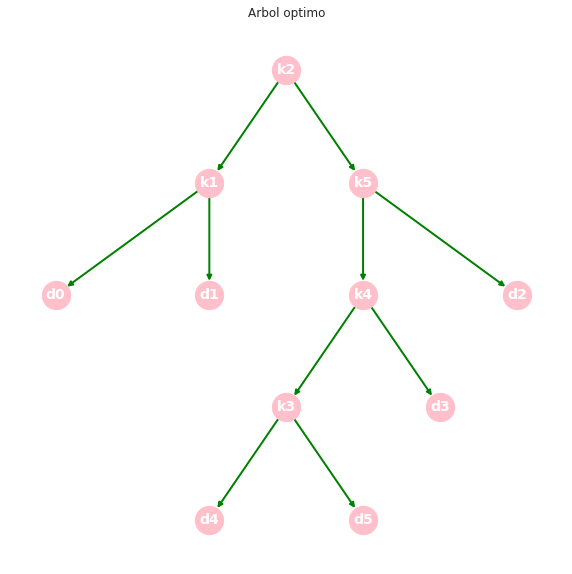

In [310]:
optimal_bst(keys, p, q, len(keys), visualize = True, verbose = True)
print()

# **3. Propiedades del algoritmo.**



## 3.1 Correctitud del algoritmo bottom-up

A continuación, se presentarán una serie de pasos con tal de demostrar que el algoritmo bottom-up es correcto.

### *a)* ***Subestructura óptima***

Sea un subárbol cualquiera del árbol binario de búsqueda $T$ que contenga claves el un rango $k_i...k_j$ con $1 \le i \le j \le n$.  Además, conteniendo las claves ficticias $d_{i-1}... d_j$. Si el árbol $T$ es óptimo y si contiene un subárbol $T'$ con las claves $k_i...k_j$, entonces este subárbol también debe ser óptimo para sus claves reales y ficticias. 

Esto se argumenta al observar que si se encontrase cualquier otro subárbol $T''$ con un costo menor que $T'$ si se cortase y remplazaa $T''$ en $T$, el costo del árbol total sería menor, incumpliendo con la declaración anterior de que $T$ era óptimo desde un inicio.

Para el subárbol $T'$, una de las claves $k_r \in i\le r\le j$ es la raíz del subárbol. El subárbol izquierdo contendrá las claves $k_i..k_{r-1}$ más las claves fuccticias $d_{i-1}...d_{r-1}$. mientras que el derecho las claves $k_{r+1}..k_{j}$ más las claves fuccticias $d_{r}...d_{j}$.

Dada esta información, una vez que se haya examinado todos los candidatos a raíz y a partir de esta, determinado todos los árboles óptimos para sus subárboles, se garantiza encontrar el árbol binario de búsqueda óptimo. El problema se reduce a encontrar el subárbol óptimo para arboles más pequeños.

<img src='https://i.imgur.com/cBt3K5I.png'>

### *b)* ***Solución recursiva***

Nuestro problema es encontrar el subárbol óptimo conteniendo las claves $k_i..k_j$ donde $i \ge 1$, $j \le n$ y $j \ge i-1$

Se define $e[i, j]$ como el costo esperado de buscar en un árbol de búsqueda óptimo conteniendo las claves $k_i..k_j$ con el objetivo final de encontrar $e[1, n]$

Cuando $j = i-1$, el subárbol solo contiene la clave ficticia $d_{i-1}$. El costo esperado es $e[i, i-1] = q_{i-1}$

Cuando $j\ge i$, se tiene que legir una raíz $r$ entre las diferentes $k$ claves disponibles, separando en subárboles en la forma que ya se mencionó anteriormente. 

Se observa que el costo esperado de un subárbol, cuando se vuelve un subárbol de un nodo, la profundidad de cada nodo incrementa en una unidad.

Se denota la suma de probabiliadades como:

$w(i, j) = \sum_{l = i}^{j}p_l + \sum_{l = i-1}^{j}q_l$

Por lo que si $k_r$ es la raíz de un subárbol óptimo para esas claves, tenemos:

$e[i, j] = p_r + (e[i, r-1] + w(i, r-1)) + (e[r+1, j] + w(r+1, j))$

Se reescribe como:

$e[i, j] = e[i, r-1] + e[r+1, j] + w(i, j)$

Esta ecuación asume que sabemos que nodo $k_r$ usar como raíz. Para enconrtrar el árbol de menor costo, terminamos con la ecuacón:

$e[i, j] = \begin{cases}
  q_{i-1}  & n j = i - 1 \\
  \min\limits_{i \le r \le j} (e[i, r-1] + e[r+1, j] + w(i, j))& \text{si $i\le j$}
\end{cases}$ 

### *c)* ***Correctitud del algoritmo bottom-up***

#### ***Teorema***

El algoritmo bottom-up resuelve el problema del árbol binario de búsqueda óptimo para un conjunto de $n$ claves con índices $k_1.. k_n$

#### ***Prueba del Teorema***

Se utilizará *inducción* para probar el teorema

**Hipótesis:**

El algoritmo bottom-up resuelve cada subproblema en base a la función recurrente y los subproblemas más pequeños calculados para un conjunto de claves $k_i... k_j$

**Caso base**

Para el caso base $n = 0$ no hay elementos en el subárbol, es decir $j = i-1$. Se cumple la declaración de forma trivial:

$e[i, j] = \begin{cases}
  q_{i-1}  & j = i - 1 \\
  \min\limits_{i \le r \le j} (e[i, r-1] + e[r+1, j] + w(i, j))& \text{si $i\le j$}
\end{cases}$ 



**Paso inductivo**

Para un subproblema de tamaño $n$ con claves $k_i.. k_j$ se asume que los problemas anteriores $n-1, n-2, ... 0$ han sido resueltos de forma correcta. Por lo tanto, se conoce el rango de índices $k_i.. k_j$ y la raíz $k_r$ que las conforman.

Se recorre cada candidato a raíz $k_r$, calculando a través de los resultados anteriormente calculados los valores candidato para el costo minímo del problema, actualizando $t =$ $costo$ $arbol$ $izquierdo$ + $costo$ $arbol$ $derecho$ + $suma$ $frecuencias$ como corresponda.

Al recorrer todas las distribuciones de $k_r$ posibles, se asegura que se encontrará el valor óptimo para el problema

### *d)* ***Volviendo al problema original***

Para el problema original, bastará con calcular e[1, n] con todos los valores anteriores calculados.


## **3.2 Tiempo de ejecución**

### ***3.2.1 Subproblemas según entrada***

### *Versión dinámica*

Basta con observar la forma en que se rellena la matriz.

Las matrices, sin contar la fila nula en la implementación utilizada, son cuadradas. De esta matriz, solo la mitad se rellena con resultados *(Desde la diagonal hacia arriba)*

Por lo tanto, la cantidad de subproblemas a resolver en función de la entrada es :

<center>

$n^2-\frac{n(n-1)}{2}$

</center>

Siendo $n^2$ el total de posiciones disponibles en la matriz cuadrada y $\frac{n(n-1)}{2}$ las posiciones de la región inferior a la diagonal, que no se utilizan.

Ejemplo: 

Para $n = 3$ la cantidad de problemas a resolver será $6$, para $n = 10$ serán $55$ y para $n = 22$ serán $253$

 


In [212]:
# Comprobacion
keys, p, q = optimal_bst_instance_generator(3)
a, b, subproblemas_3 = optimal_bst(keys, p, q, len(keys))

subproblemas_3

6

In [213]:
# Comprobacion
keys, p, q = optimal_bst_instance_generator(10)
a, b, subproblemas_10 = optimal_bst(keys, p, q, len(keys))

subproblemas_10

55

In [214]:
# Comprobacion
keys, p, q = optimal_bst_instance_generator(22)
a, b, subproblemas_22 = optimal_bst(keys, p, q, len(keys))

subproblemas_22

253

#### ***3.2.2 Tiempo de ejecución***

### *Versión recursiva*

#### ***Teorema***

El algoritmo bottom-up para el problema del árbol binario de búsqueda óptimo resuelve el problema en un tiempo de ejecución $O(n^3)$

Esto se debe a que hay un total del n^2 sub

#### ***Prueba***

Para comprobar el tiempo de ejecución basta con revisar el pseudocódigo del algoritmo:

* El primer loop en la línea $7$  itera $n$ veces
* Dentro de este, el segundo loop itera, a lo más, n veces
* El último loop itera nuevamente n veces a lo más

Lo que resulta en un tiempo de ejecución de $O(n)$

####***3.2.3 Complejidad espacial***

#### *Versión recursiva*

Sin considerar la lista utilizada para guardar los nodos y sus parenteszcos en esta implementación, el algoritmo recursivo tiene una complejidad espacial constante. No necesita ni almacena infromación extra a medida de que va resolviendo subproblemas, por lo que su complejidad espacial es de $O(1)$

---

#### *Versión bottom-up*

La solución dinámica bottom-up tiene una complejidad espacial de $O(n^2)$.

Esto se debe a las tres matrices $e$, $w$, y $root$ que almacenan la infromación, de tamaños $(n+1)^2$, $(n+1)^2$ y $n^2$, respectivamente.

Para valores de $n$ muy grandes, la expresión $2(n+1)^2 + n^2 = 3n^2 + 4n + 2$ se reduce a $O(n^2)$

---


# **4. Experimentos**

## ***4.1 Tiempo de ejecución***

Comparación entre el tiempo de ejecución de ambos algoritmos para $n = 5... 20$


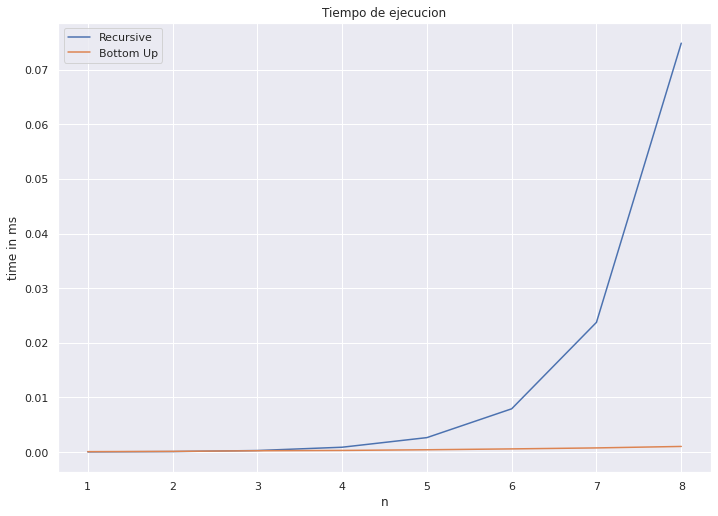

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat
import numpy as np

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; x2=[]
y=[]; y2=[]

for n in range(1,9):
  keys, p, q = optimal_bst_instance_generator(n)

  t = repeat(setup="from __main__ import recursive_bst", stmt=f"recursive_bst({keys},{p}, {q.tolist()}, {n})", repeat=1, number=10)
  
  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import optimal_bst", stmt=f"optimal_bst({keys},{p}, {q.tolist()}, {n})", repeat=1, number=10)
  
  x2.append(n)
  y2.append(t)

  
plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Recursive", "Bottom Up"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Similar a lo observado cuando se analizó el algoritmo para el problema de `RodCutting`, el tiempo de ejecución del algoritmo recursivo opaca completamente el de la versión con programación dinámica. Esto se debe a la cantidad exponencial de problemas que debe resolver la versión recursiva, resolviendo los mismos problemas si es que así se le pide. 

Se nota, dado el acelerado aumento del tiempo de ejecución a medida de que aumenta $n$, la exponencialidad del tiempo de ejecución en función de $n$.